# ###introduction

These claims were that:
1.	Violent Crime is increasing
2.	There are more firearms incidents per head in Birmingham than anywhere else in the UK
3.	Crimes involving firearms are closely associated with drugs offences



To solve this problem, you will use publicly available data sets that have been prepared for you and placed online. These include (but are not limited to):-
1.	Street Level Crime Data published by the UK Home Office, this dataset contains 19 million data rows giving a crime type, together with their location as a latitude and longitude.
2.	English Indices of Deprivation Data: The English Indices of Deprivation 2010 data set contains the rankings of measures of deprivation within small area level across England. The 32000 localities are ranked from the least to most deprived, scored on seven different dimensions of deprivation.


Specifics
1.	Process the given data efficiently using Apache Spark on a cloud Infrastructure as a Service (IaaS) platform. A sample Jupyter Notebook has been provided on Blackboard.
2.	Filter the dataset so that only relevant crimes are included.
3.	Using appropriate techniques, determine whether Violent Crimes are increasing, decreasing, or are stable.
4.	Determine whether there are more firearms incidents per head in Birmingham than anywhere else in the UK. Possession of firearms carries a mandatory prison sentence in the UK. Therefore, you may assume that a crime type of “Possession of weapons” whose outcome is “offender sent to prison” was a firearm incident.
5.	Using appropriate techniques, determine whether firearms incidents are associated with drugs offences.
6.	Select and prepare no more than four visualizations to support your analytic findings from (3).
7.	Explain the reasoning behind your code so that it is clear what each block is intended to achieve (i.e., appropriately comment the command line).
8.	Assess the three claims given and determine whether they are true, false, or cannot be determined.




#### Importing libraries and dataset

if you bare importing data from blob storage then you must transform the data into RDD
if you are not importing data from blob storage, use dataframe to convert date to use it. - will probably do that

In [1]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import pandas as pd

spark = SparkSession.builder.appName("Python and Spark SQL").config("spark.some.config.option", "some-value").getOrCreate()
#Check we have a spark context: Should show the spark version and app name
sc = spark.sparkContext
sc #Check we have a spark context: Should show the spark version and app name



<SparkContext master=local[*] appName=Python and Spark SQL>

In [2]:
#checking files are in path
!ls -l
!pwd

total 136068
-rw-r--r-- 1 notebookuser notebookuser    115689 Dec  5 21:18  AssignmentV10.ipynb
-rw-r--r-- 1 notebookuser notebookuser    144304 Dec  5 22:20  AssignmentV11.ipynb
-rw-r--r-- 1 notebookuser notebookuser   2505684 Dec  5 18:28  LSOA_pop_v2.csv
-rw-r--r-- 1 notebookuser notebookuser 136526474 Dec  5 18:28  Sample_1pc_Data.csv
-rw-r--r-- 1 notebookuser notebookuser     25986 Dec  5 18:29 'w18016571 (1).ipynb'
/home/notebookuser


In [3]:
#shows dataframe of the csv file
df= spark.read.csv("Sample_1pc_Data.csv", header=True, inferSchema =True)
#inferschema by default is false but when assigned to True, it automatically infers columns types based on the data
df.printSchema()

root
 |-- Crime ID: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- Reported by: string (nullable = true)
 |-- Falls within: string (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- LSOA code: string (nullable = true)
 |-- LSOA name: string (nullable = true)
 |-- Crime type: string (nullable = true)
 |-- Last outcome category: string (nullable = true)
 |-- Context: string (nullable = true)



In [4]:
df.show() #shows dataframe

+--------+-------+--------------------+--------------------+---------+---------+--------------------+---------+--------------------+--------------------+---------------------+-------+
|Crime ID|  Month|         Reported by|        Falls within|Longitude| Latitude|            Location|LSOA code|           LSOA name|          Crime type|Last outcome category|Context|
+--------+-------+--------------------+--------------------+---------+---------+--------------------+---------+--------------------+--------------------+---------------------+-------+
|    null|2010-12|Avon and Somerset...|Avon and Somerset...|-2.345526|51.398948|On or near Daffor...|E01014409|Bath and North Ea...|Anti-social behav...|                 null|   null|
|    null|2010-12|Avon and Somerset...|Avon and Somerset...|-2.398165|51.398925|On or near Symes ...|E01014477|Bath and North Ea...|         Other crime|                 null|   null|
|    null|2010-12|Avon and Somerset...|Avon and Somerset...|-2.349528|51.393991|

https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.fillna.html

https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.filter.html

In [5]:
#schema creation
from pyspark.sql.types import * 

#defining the schema types 
schema = StructType(
[StructField("CrimeID", StringType(), False),
 StructField("Date", StringType(), False),
 StructField("ReportedBy", StringType(), False),
 StructField("FallsWithin", StringType(), False),
 StructField("Longitude", StringType(), False),
 StructField("Latitude", IntegerType(), False),
 StructField("Location", StringType(), False),
 StructField("LSOACode", StringType(), False),
 StructField("LSOAName", StringType(), False),
 StructField("CrimeType", StringType(), False),
 StructField("LastOutcomeCategory", StringType(), False),
 StructField("context", StringType(), False),
 
])

In [6]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import pandas as pd

datasource = "Sample_1pc_Data.csv"
data = sc.textFile(datasource)
data.count

<bound method RDD.count of Sample_1pc_Data.csv MapPartitionsRDD[15] at textFile at NativeMethodAccessorImpl.java:0>

In [7]:
df = spark.read.load(datasource, format="csv", schema=schema, header="true", sep=",", inferSchema =True)

#df should be 648521 after duplicates have been removed (with header as true - so that the first line is used as a header)
df = df.dropDuplicates() #removes duplicates
#df.count() #shows output of 648521


In [8]:
#filter dataframe to show violent crimes and violence sexual offences
#df.filter(df["CrimeType"] == "Violent crime") or (df["CrimeType"] == "Violence and sexual offences")
#df.show()
#df.count()

          
#df_new = df.withColumn('Location',sf.when((df.cd == 'A') & (df.id isin(['AAA','BBB'])),'New_Loc').otherwise(df.Location))

## # 3.	Using appropriate techniques, determine whether Violent Crimes are increasing, decreasing, or are stable.


In [9]:
# Task 1.	Start Jupyter and Create a new Notebook
%matplotlib inline
import numpy as np
import pandas as pd

import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt
from pyspark import SparkFiles
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import count, avg, sum, col, to_date

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [10]:
# grouping columns and using agg
count_df = df.select("Date","CrimeType") \
    .where((df.CrimeType== 'Violent crime') | (df.CrimeType == 'Violence and sexual offences'))\
    .groupBy('Date').count().withColumnRenamed( "count", "CrimeNo")\
    .orderBy('Date', 'CrimeNo', ascending = False)
    

In [28]:
count_df.show() # shows the date and crime number

+-------+-------+
|   Date|CrimeNo|
+-------+-------+
|2021-05|   1722|
|2021-04|   1540|
|2021-03|   1669|
|2021-02|   1319|
|2021-01|   1434|
|2020-12|   1520|
|2020-11|   1503|
|2020-10|   1649|
|2020-09|   1681|
|2020-08|   1757|
|2020-07|   1782|
|2020-06|   1581|
|2020-05|   1434|
|2020-04|   1293|
|2020-03|   1441|
|2020-02|   1538|
|2020-01|   1625|
|2019-12|   1524|
|2019-11|   1456|
|2019-10|   1548|
+-------+-------+
only showing top 20 rows



126

In [29]:
count_df.count()

126

look at time series workshop
convert month into date or index, use that to determine if violent crimes are increase, decreasing or stable.


In [12]:
pdf = count_df.toPandas()

In [13]:
# Task 4.	Convert the Pandas Dataframe to be TimeIndexed
pdf.Date = pdf.Date.astype('datetime64[ns]')
pdf2 = pdf.set_index(pd.to_datetime(pdf.Date))
#the data type of the datetime column is a datetime64[ns] object. 
#The [ns] means the nano second-based time format that specifies the precision of the DateTime object.




# ##visualisation


In [14]:
pdf2.index #view index of pdf2

DatetimeIndex(['2021-05-01', '2021-04-01', '2021-03-01', '2021-02-01',
               '2021-01-01', '2020-12-01', '2020-11-01', '2020-10-01',
               '2020-09-01', '2020-08-01',
               ...
               '2011-09-01', '2011-08-01', '2011-07-01', '2011-06-01',
               '2011-05-01', '2011-04-01', '2011-03-01', '2011-02-01',
               '2011-01-01', '2010-12-01'],
              dtype='datetime64[ns]', name='Date', length=126, freq=None)

In [15]:
pdf

,Date,CrimeNo
0,2021-05-01,1722
1,2021-04-01,1540
2,2021-03-01,1669
3,2021-02-01,1319
4,2021-01-01,1434
...,...,...
121,2011-04-01,644
122,2011-03-01,606
123,2011-02-01,573
124,2011-01-01,578


In [16]:
pdf.Date = pdf.Date.astype('datetime64[ns]')
pdf2 = pdf.set_index(pd.to_datetime(pdf.Date))

In [17]:
pdf2.index

DatetimeIndex(['2021-05-01', '2021-04-01', '2021-03-01', '2021-02-01',
               '2021-01-01', '2020-12-01', '2020-11-01', '2020-10-01',
               '2020-09-01', '2020-08-01',
               ...
               '2011-09-01', '2011-08-01', '2011-07-01', '2011-06-01',
               '2011-05-01', '2011-04-01', '2011-03-01', '2011-02-01',
               '2011-01-01', '2010-12-01'],
              dtype='datetime64[ns]', name='Date', length=126, freq=None)

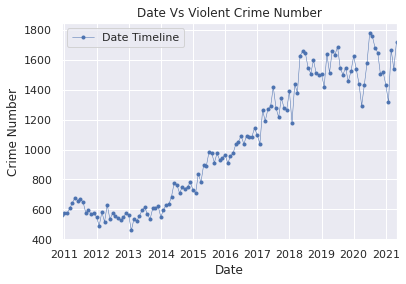

In [18]:
#TESTING TO SEE COUNT AS NUMBER OF VIOLENT CRIME TYPE
# Task 5.	An initial Lineplot
plt.figsize = (40, 40)
pdf2.plot(y='CrimeNo', x='Date', marker='.', linestyle='-', linewidth=0.5,\
         subplots=False,
             label='Date Timeline',
             title='Date Vs Violent Crime Number')
plt.ylabel('Crime Number')
plt.show()



Findings shows results of violent Crime  and  Violence and sexual offences
from 2011 to 2013 crimes are relatively low, from 2014 violent crimes starts to increase until 2019. From 2019 to 2021, violent crimes are continuously high bearly 1800.



In [19]:
pdf2.sort_index(inplace = True) #shows the right order of the index to be true, else decomposition will not work

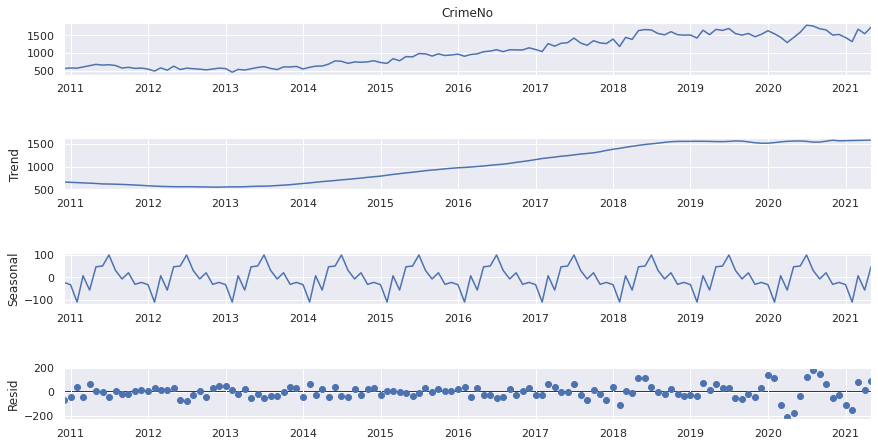

In [20]:
# Task 6.	Time Series Decomposition'
import statsmodels as sm
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(pdf2['CrimeNo'], model='additive',extrapolate_trend='freq')
fig = decomposition.plot()
fig.set_size_inches(14,7)
plt.show() #will show seasonal, residual and trend of time series

### Findings on why crimes results are different

Time Series decomposition is a way to separate time series into different parts such as trend, seasonal and residual which are all components of Time series. Additive decomposition contains the trend, seasonal and residual components[2]


Seasonality: describes periodi signal for the time series
Trend: describes if the time series is increasing, decreasing or stable overtime. [1]

From the decomposition using time series, we can see the increase of crimes in a decade from 2011 to 2021., crimes are low in 2011 but are increasing as the years increases.

The data  for Residual shows crimes from 2011 to 2016m crimes are relatively low, however from 2017 to 2021, we see crimes increasing quite rapidly.


The data for Seasonal shows that violent crimes are low at the beginning of the year but increases spikes up in the middle of the year, and later on gradually decreases until it becomes  fairly low just before the new year.

The data for the Trend on violent crimes, in 2013 the crimes.From 2014 crimes gradually increases each year, in 2021 we see crimes rapidly increasing above 1500. 

Please note violent crimes includes: Violence and sexual offences and Violent crimes.
in 2013............. violent crime...........................................



### 4. Determine whether there are more firearms incidents per head in Birmingham than anywhere else in the UK. Possession of firearms carries a mandatory prison sentence in the UK. Therefore, you may assume that a crime type of “Possession of weapons” whose outcome is “offender sent to prison” was a firearm incident.

Crime Type of: "Possession of Weapons" 
Whose Outcome == "Offender sent to prison"
---> Firearm Incident


In [21]:
# grouping columns and using agg for possession of weapons whose outcome was 'offender sent to prison' was a firearm incident
count_two_df = df.select("CrimeType","LastOutcomeCategory") \
    .where(df.CrimeType== 'Possession of weapons')\
    .groupBy('CrimeType').count().withColumnRenamed( "count", "Number_of_Possession_of_weapons")


In [22]:
count_two_df.show() #shows a total 2753 of crime type which is possesison of weapons 

+--------------------+-------------------------------+
|           CrimeType|Number_of_Possession_of_weapons|
+--------------------+-------------------------------+
|Possession of wea...|                           2753|
+--------------------+-------------------------------+



In [23]:
#shows dataframe of the csv file
df2= spark.read.csv("LSOA_pop_v2.csv", header=True, inferSchema =True)
#inferschema by default is false but when assigned to True, it automatically infers columns types based on the data
df2.printSchema()

root
 |-- date: integer (nullable = true)
 |-- geography: string (nullable = true)
 |-- geography code: string (nullable = true)
 |-- Rural Urban: string (nullable = true)
 |-- Variable: All usual residents; measures: Value: integer (nullable = true)
 |-- Variable: Males; measures: Value: integer (nullable = true)
 |-- Variable: Females; measures: Value: integer (nullable = true)
 |-- Variable: Lives in a household; measures: Value: integer (nullable = true)
 |-- Variable: Lives in a communal establishment; measures: Value: integer (nullable = true)
 |-- Variable: Schoolchild or full-time student aged 4 and over at their non term-time address; measures: Value: integer (nullable = true)
 |-- Variable: Area (Hectares); measures: Value: double (nullable = true)
 |-- Variable: Density (number of persons per hectare); measures: Value: double (nullable = true)



In [24]:
df2.count()

34753

In [25]:
#schema creation FOR lsoa_Pop_v2 dataset
from pyspark.sql.types import * 

#defining the schema types 
schema = StructType(
[StructField("date", StringType(), False),
 StructField("Geography", StringType(), False),
 StructField("GeographyCode", StringType(), False),
 StructField("RuralUrban", StringType(), False),
 StructField("AllUsualResidents;", StringType(), False),
 StructField("MalesMeasuresValue", IntegerType(), False),
 StructField("FemalesMeasuresValue", StringType(), False),
 StructField("LivesInAHousehold", StringType(), False),
 StructField("LivesInACommunal", StringType(), False),
 StructField("SchoolchildOrFullT", StringType(), False),
 StructField("AreaMeasure", StringType(), False),
 StructField("Density", StringType(), False),
 
])

In [26]:
schema

StructType(List(StructField(date,StringType,false),StructField(Geography,StringType,false),StructField(GeographyCode,StringType,false),StructField(RuralUrban,StringType,false),StructField(AllUsualResidents;,StringType,false),StructField(MalesMeasuresValue,IntegerType,false),StructField(FemalesMeasuresValue,StringType,false),StructField(LivesInAHousehold,StringType,false),StructField(LivesInACommunal,StringType,false),StructField(SchoolchildOrFullT,StringType,false),StructField(AreaMeasure,StringType,false),StructField(Density,StringType,false)))

In [27]:
pd.merge(df, df2, on = "LSOAName", how = "inner")

TypeError: Can only merge Series or DataFrame objects, a <class 'pyspark.sql.dataframe.DataFrame'> was passed

9.	Critically assess and report on the advantages, disadvantages, and limitations of the methods used. 

10.	Your submission will be a Jupyter Notebook containing both code (typically Python), and explanatory text (in Markdown format) limited to 2500 words (plus references). References from the scientific literature must be used (please follow IEEE format) and your discussion must be your own words. DO NOT CUT AND PASTE FROM THE INTERNET.

#### References

[1] https://towardsdatascience.com/time-series-decomposition-in-python-8acac385a5b2

[2] https://towardsdatascience.com/multi-seasonal-time-series-decomposition-using-mstl-in-python-136630e67530#:~:text=Time%20series%20decomposition%20is%20about,ARIMA%2DSEATS%20%5B3%5D.